In [1]:
#STUDENT NAME: SHRUTHI
#STUDENT ID: 801218392
#HOMEWORK 5 QUESTION 1

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

In [3]:
#Creating the tensors for the temperature in celcius- target(t_c) and the temperature in farenheit- input(t_u)
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [4]:
#Definition of the model, as per the question
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [5]:
#Defining the mean squared error loss
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [6]:
#Initializing the weights and the biases as a array of ones and zeros respectively
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w1, w2, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [7]:
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [8]:
#Defining the step size
delta = 0.1

loss_rate_of_change_w1 = \
    (loss_fn(model(t_u, w1 + delta, w2, b), t_c) - 
     loss_fn(model(t_u, w1 - delta, w2, b), t_c)) / (2.0 * delta)
loss_rate_of_change_w2 = \
    (loss_fn(model(t_u, w1, w2 + delta, b), t_c) - 
     loss_fn(model(t_u, w1, w2 - delta, b), t_c)) / (2.0 * delta)

In [9]:
learning_rate = 1e-2

w1 = w1 - learning_rate * loss_rate_of_change_w1
w2 = w2 - learning_rate * loss_rate_of_change_w2

In [10]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w1, w2, b + delta), t_c) - 
     loss_fn(model(t_u, w1, w2, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [11]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

In [12]:
def dmodel_dw1(t_u, w1, w2, b):
    return t_u

In [13]:
def dmodel_dw2(t_u, w1, w2, b):
    return t_u

In [14]:
def dmodel_db(t_u, w1, w2, b):
    return 1.0

In [15]:
def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1, w2, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])  # <1>

In [16]:
#Defining the training loop and putting all the functions together- the model, the loss and the gradient descent function
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params

        t_p = model(t_u, w1, w2, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)  # <2>

        params = params - learning_rate * grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>
            
    return params

In [17]:
#Defining the training loop for 2000 epochs, learning rate - 0.1
training_loop(
    n_epochs = 2000, 
    learning_rate = 1e-1, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan


tensor([nan, nan, nan])

In [18]:
# A form of "standardizing" the input, multiplying all the parameters with 0.1 in t_u
t_un = 0.1 * t_u

In [19]:
#Defining the training loop for 2000 epochs, learning rate - 0.1 using the "standardized" input
params = training_loop(
    n_epochs = 2000, 
    learning_rate = 1e-1, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_un, # <1>
    t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan


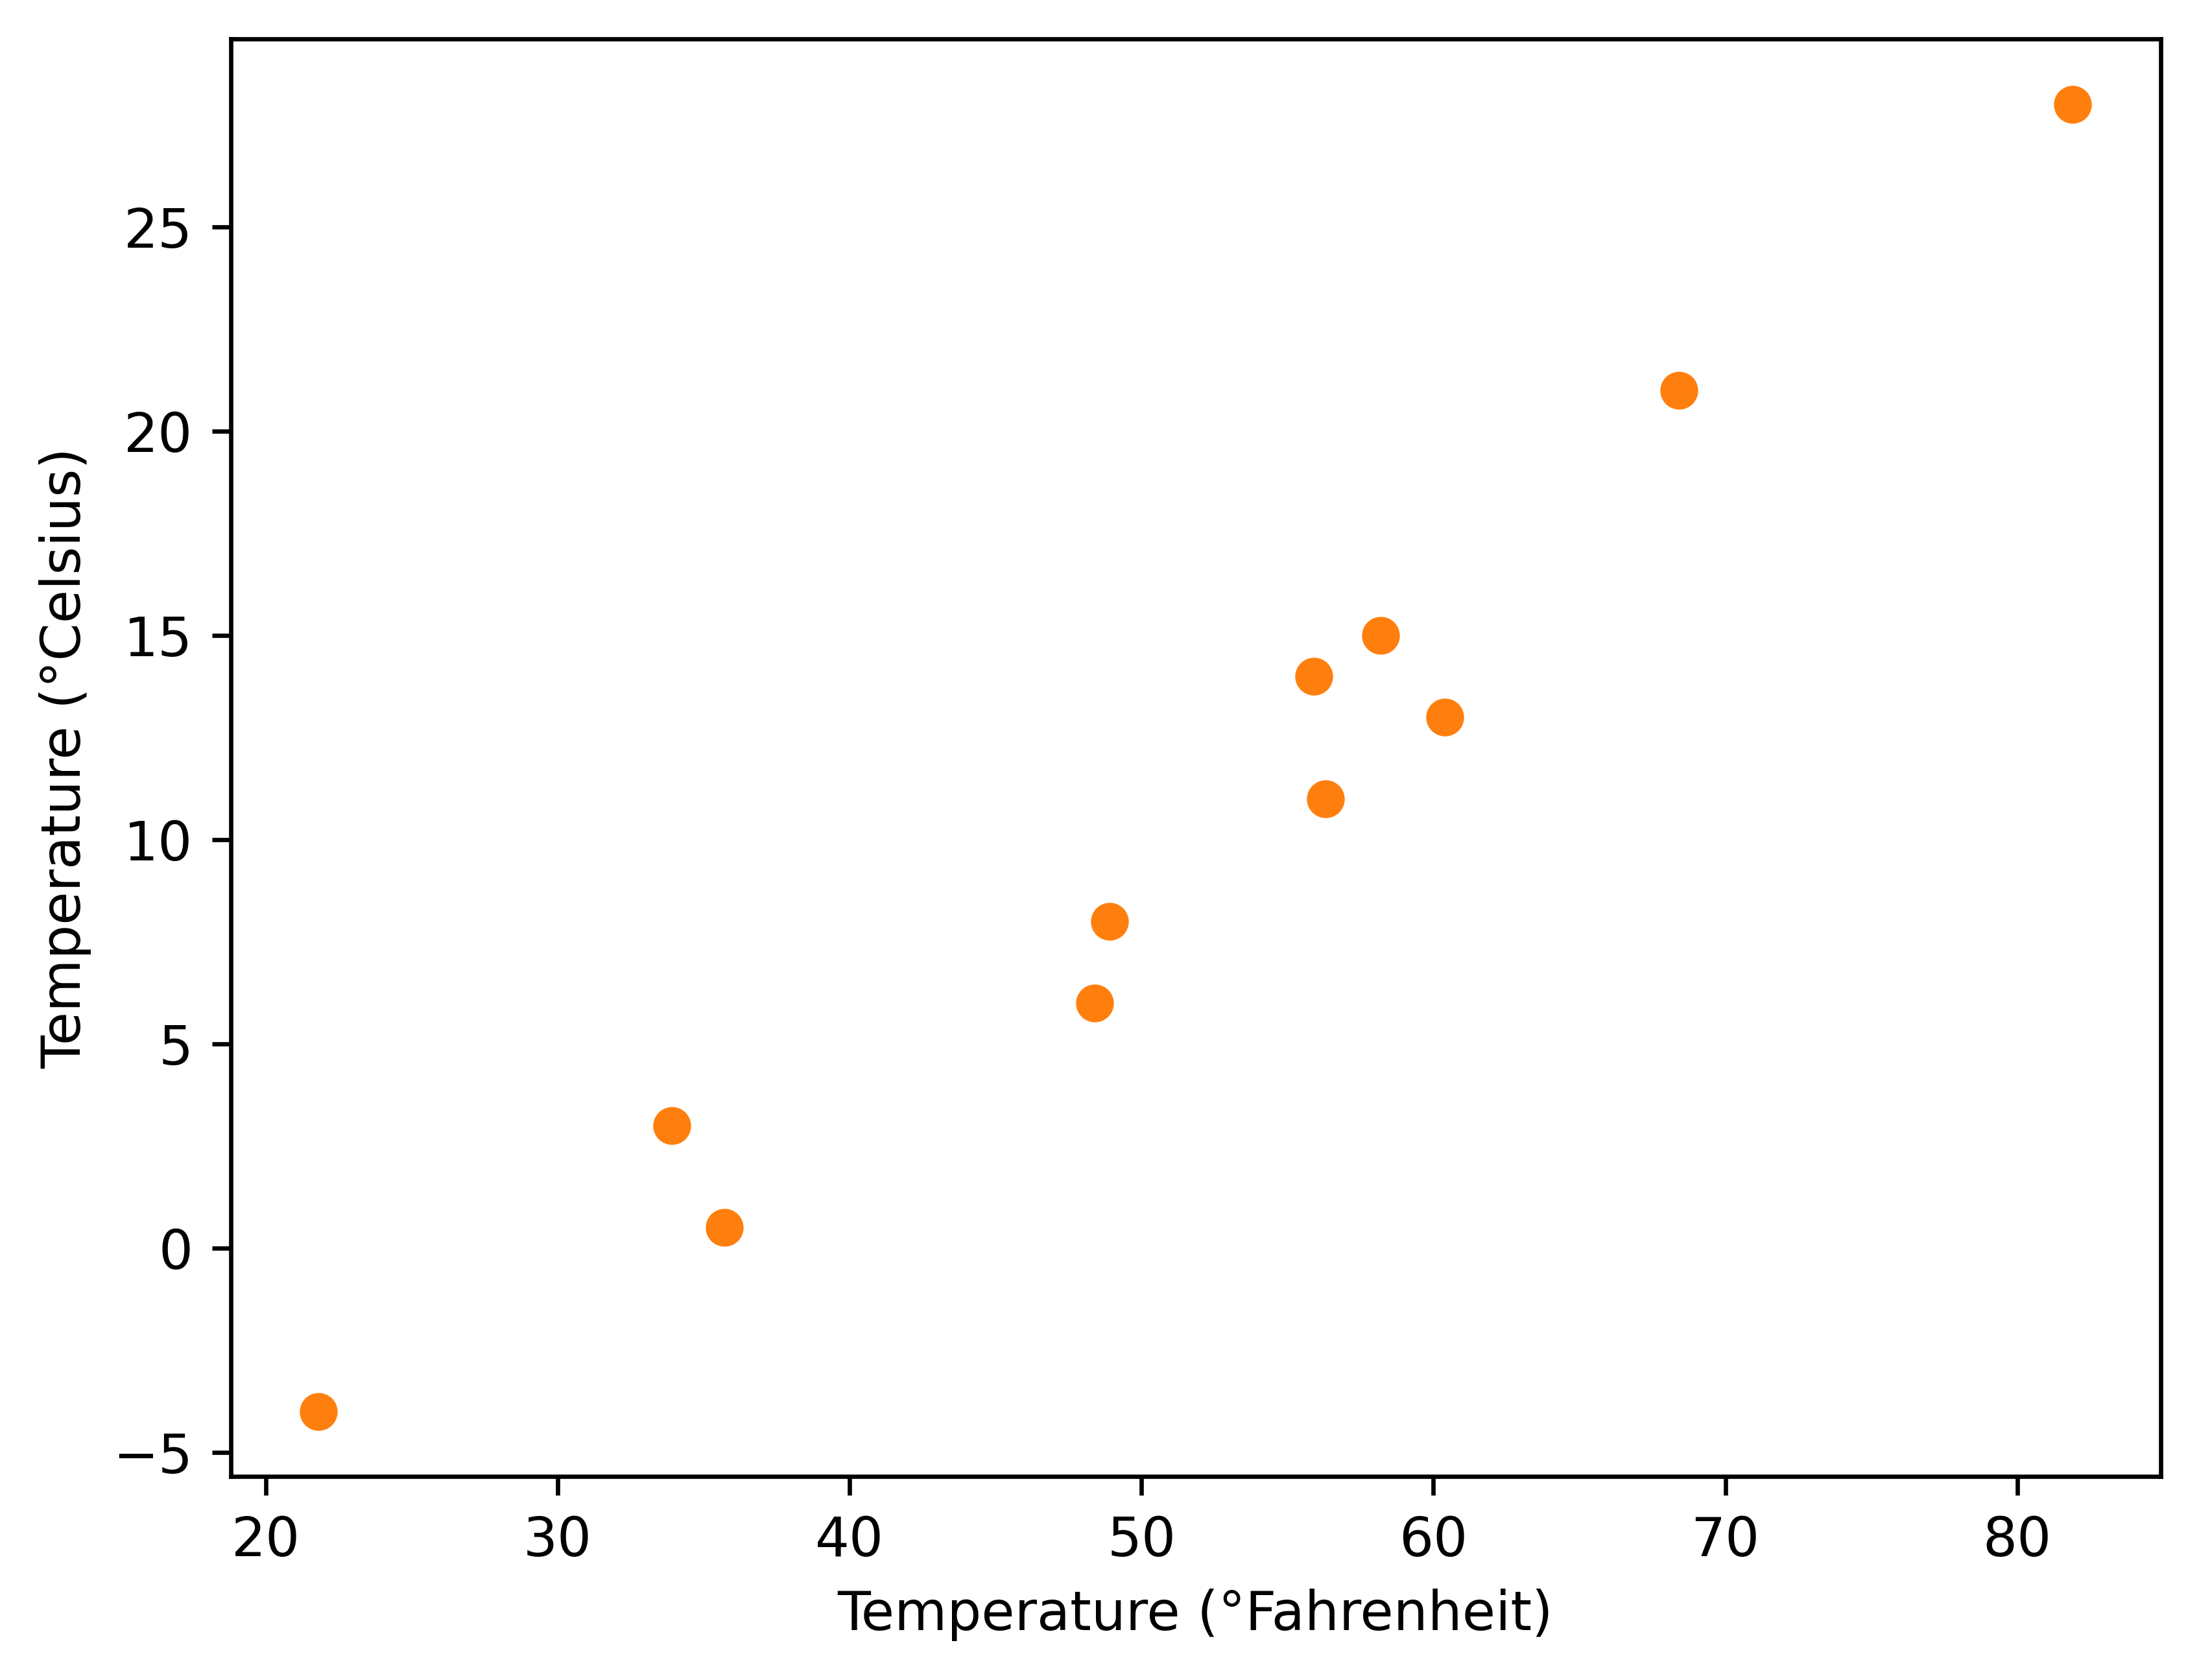

In [20]:
#Plotting the values. The line cannot be seen as the values for the loss are too big, NaN
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)  # <1>
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.show()
#plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

In [21]:
#Defining the training loop for 2000 epochs, learning rate - 0.01
params = training_loop(
    n_epochs = 2000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan


In [22]:
#Defining the training loop for 2000 epochs, learning rate - 0.01 using the "standardized" input
params = training_loop(
    n_epochs = 2000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan


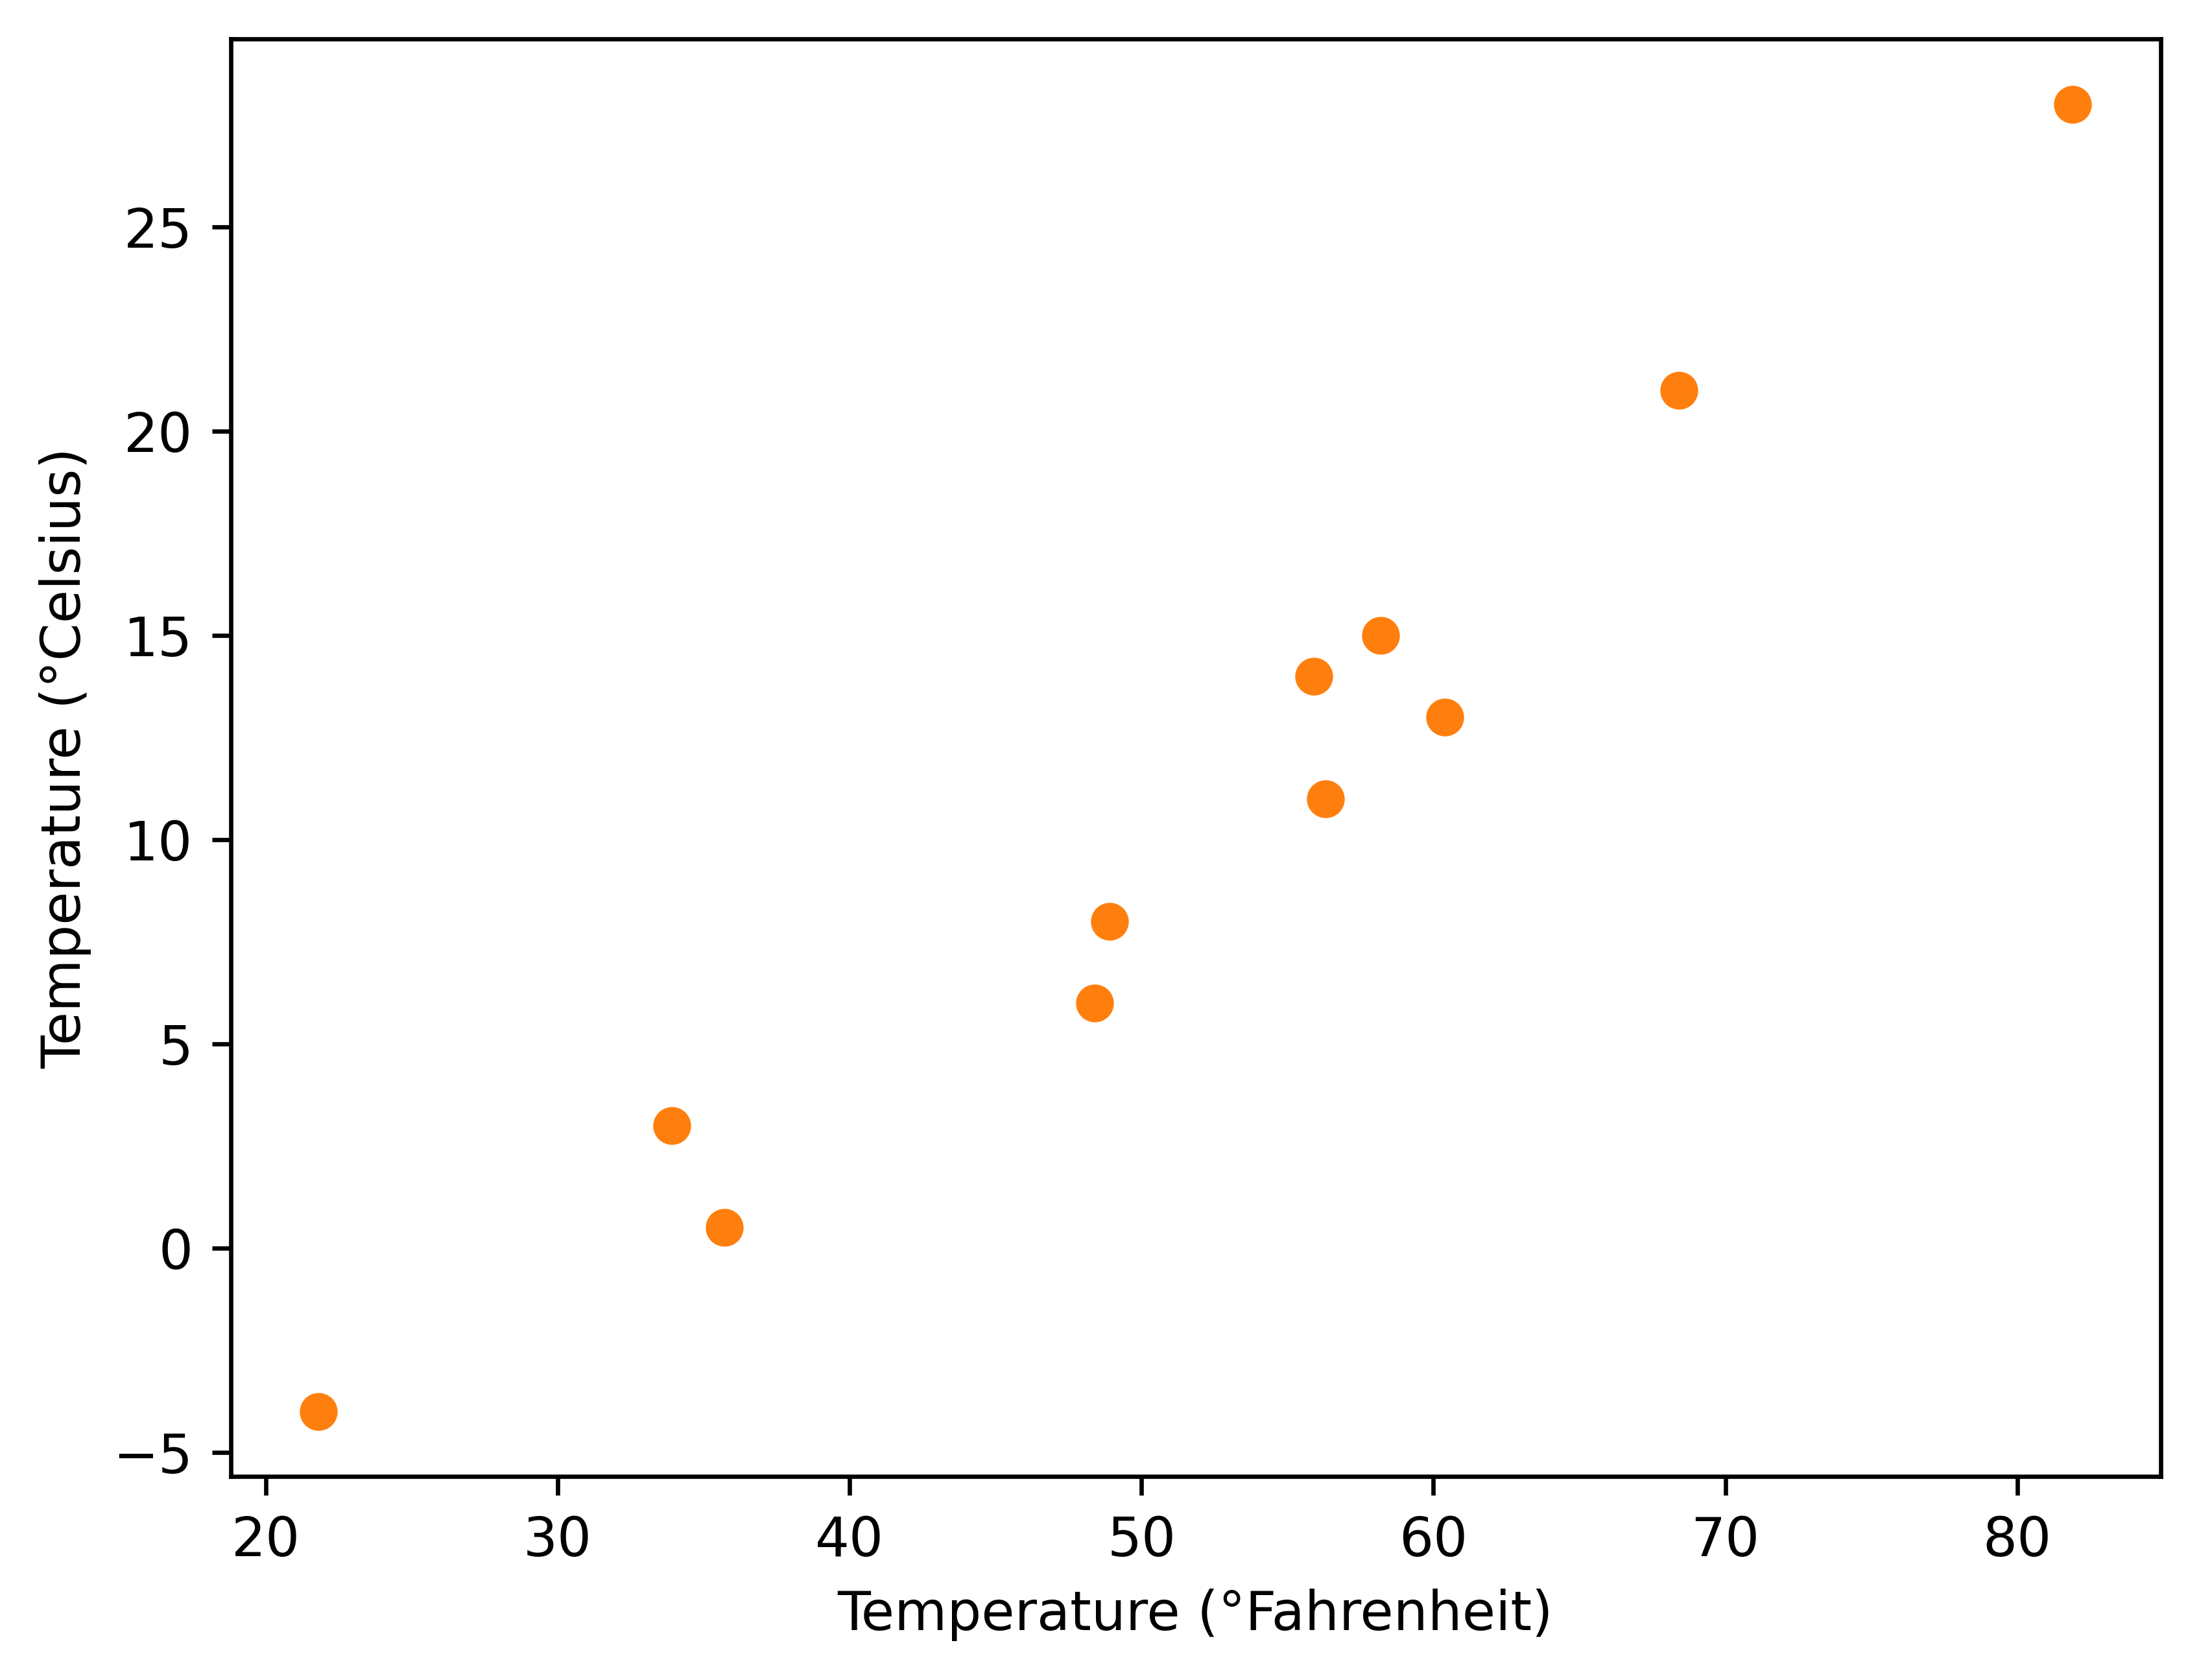

In [23]:
#Plotting the values. The line cannot be seen as the values for the loss are too big, NaN
fig = plt.figure(dpi=600)
t_p = model(t_un, *params)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

In [24]:
#Defining the training loop for 2000 epochs, learning rate - 0.001
params = training_loop(
    n_epochs = 2000, 
    learning_rate = 1e-3, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan


In [25]:
#Defining the training loop for 2000 epochs, learning rate - 0.001 using the "standardized" input
params = training_loop(
    n_epochs = 2000, 
    learning_rate = 1e-3, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c)

Epoch 500, Loss 8.035689
Epoch 1000, Loss 6.636409
Epoch 1500, Loss 5.582901
Epoch 2000, Loss 4.790622


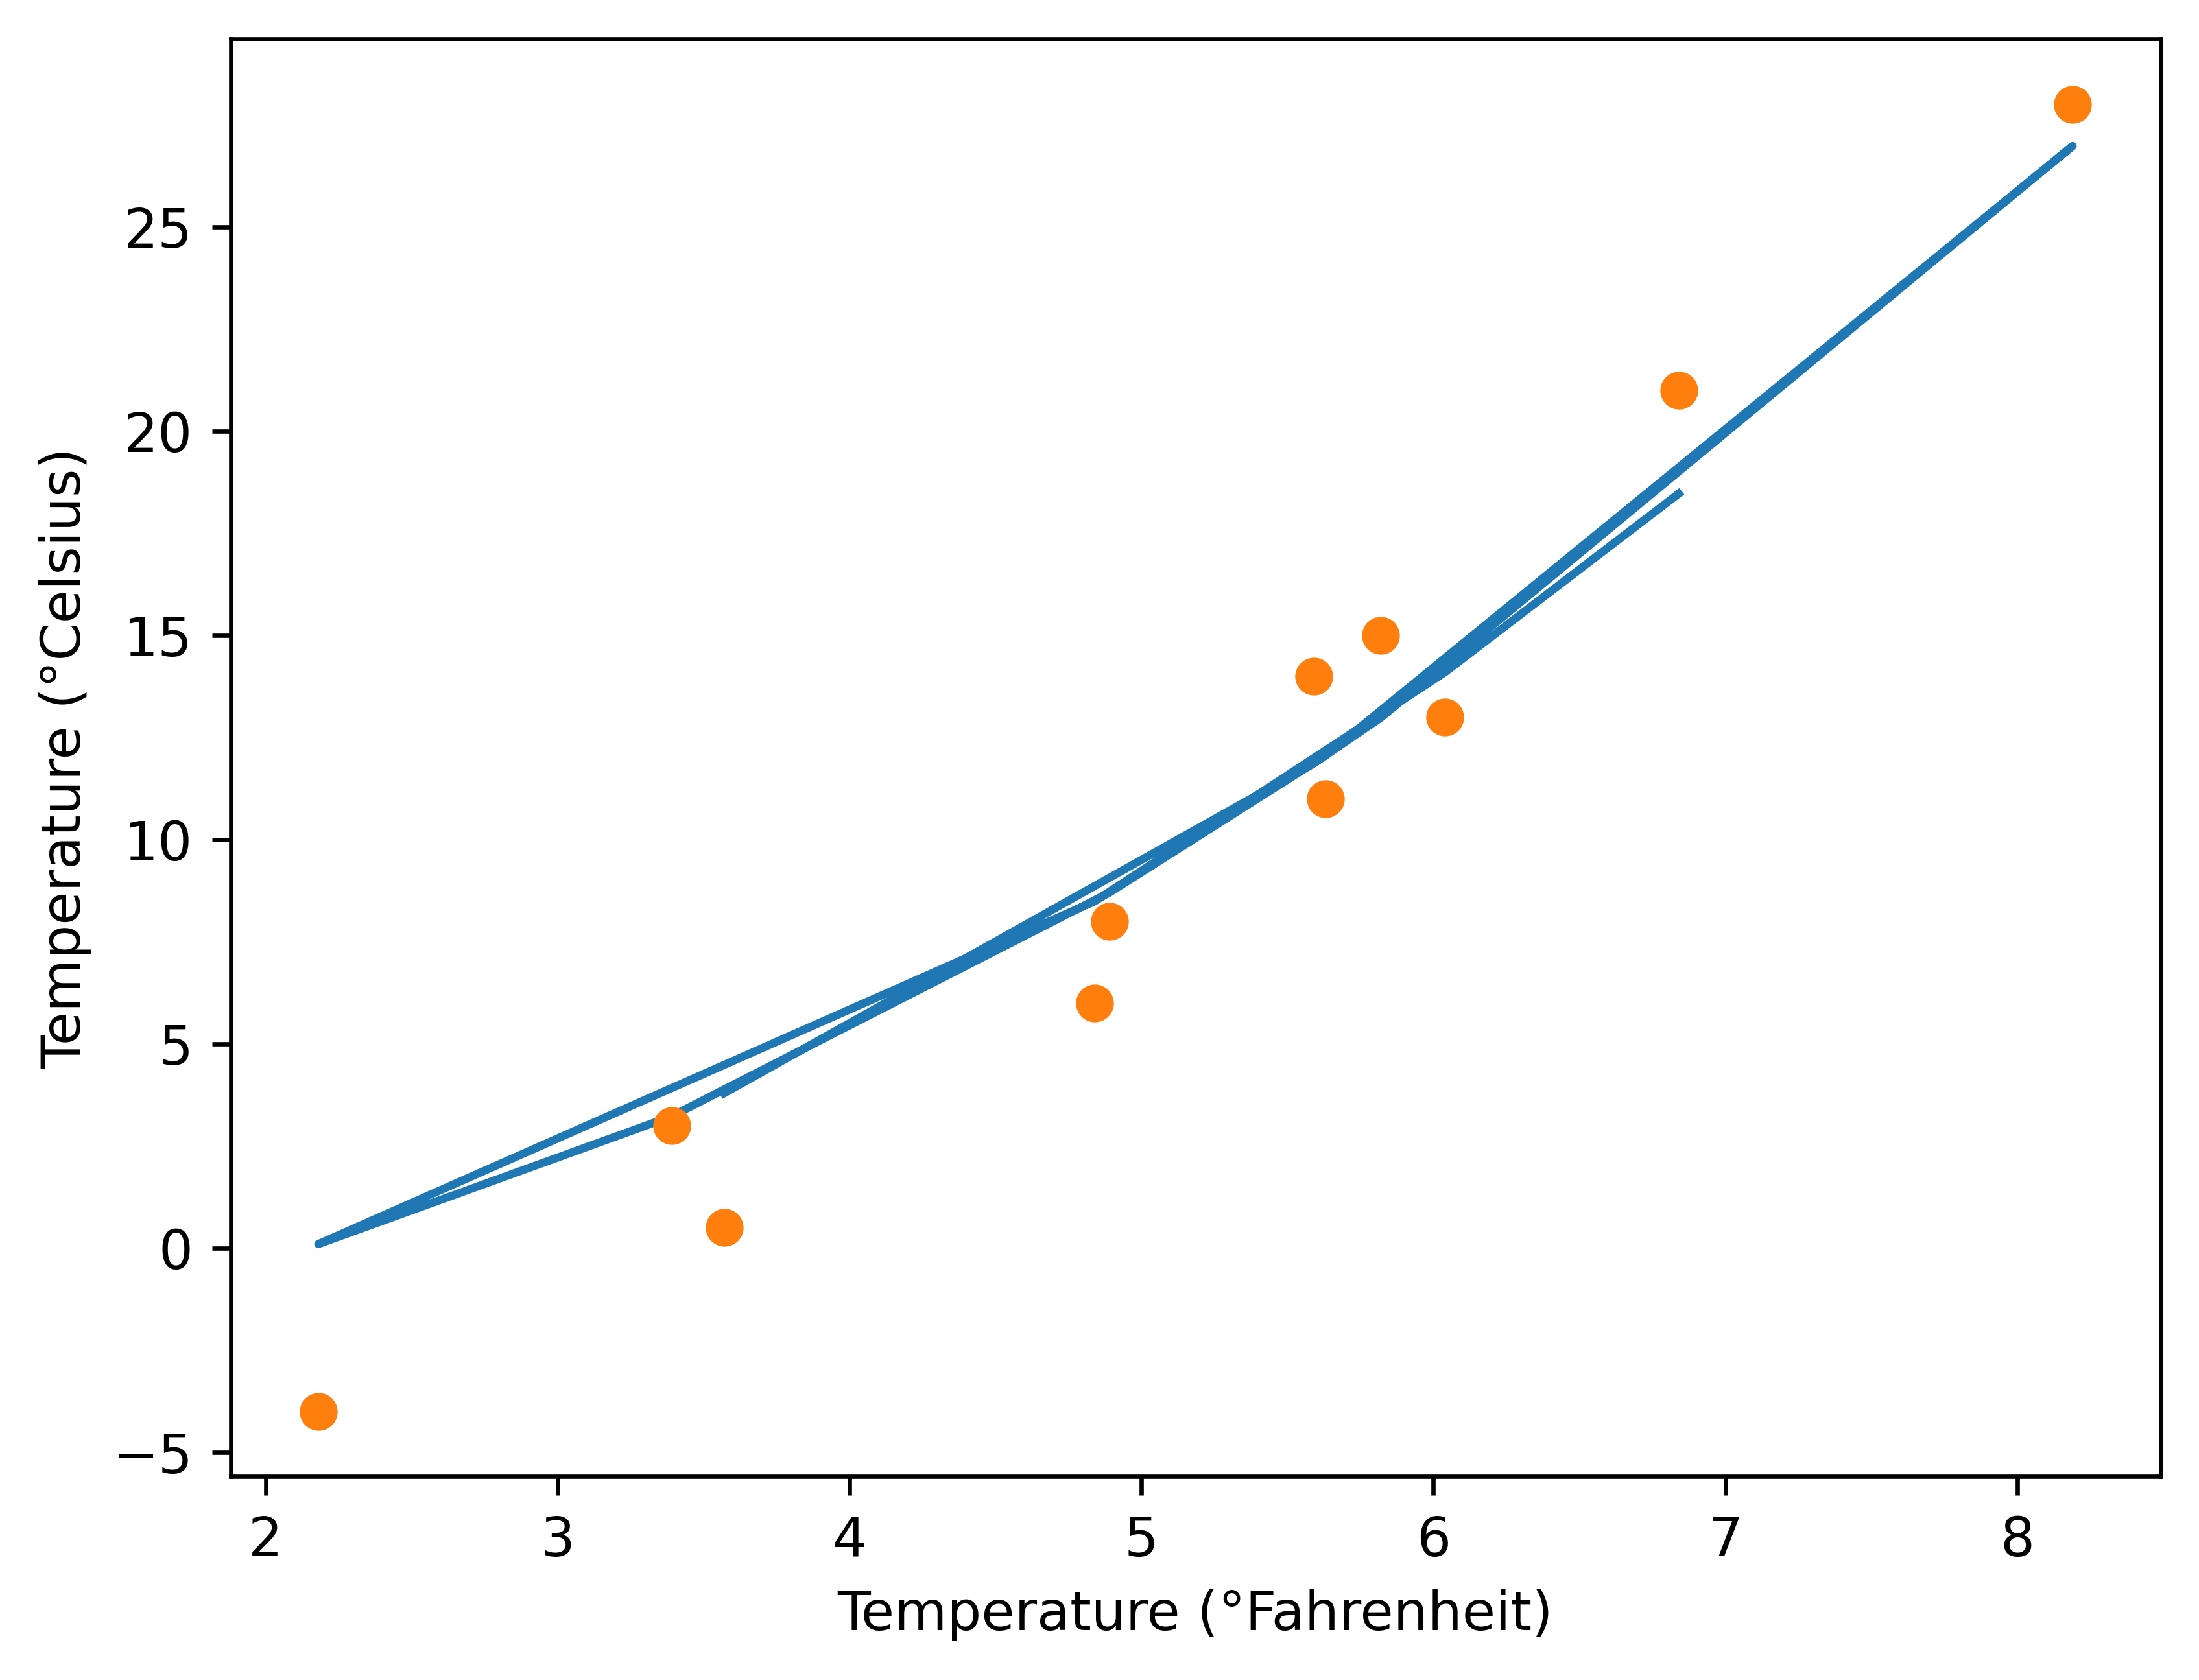

In [26]:
#Plotting the values
fig = plt.figure(dpi=600)
t_p = model(t_un, *params)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_un.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_un.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

In [27]:
#Defining the training loop for 2000 epochs, learning rate - 0.0001
params = training_loop(
    n_epochs = 2000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan


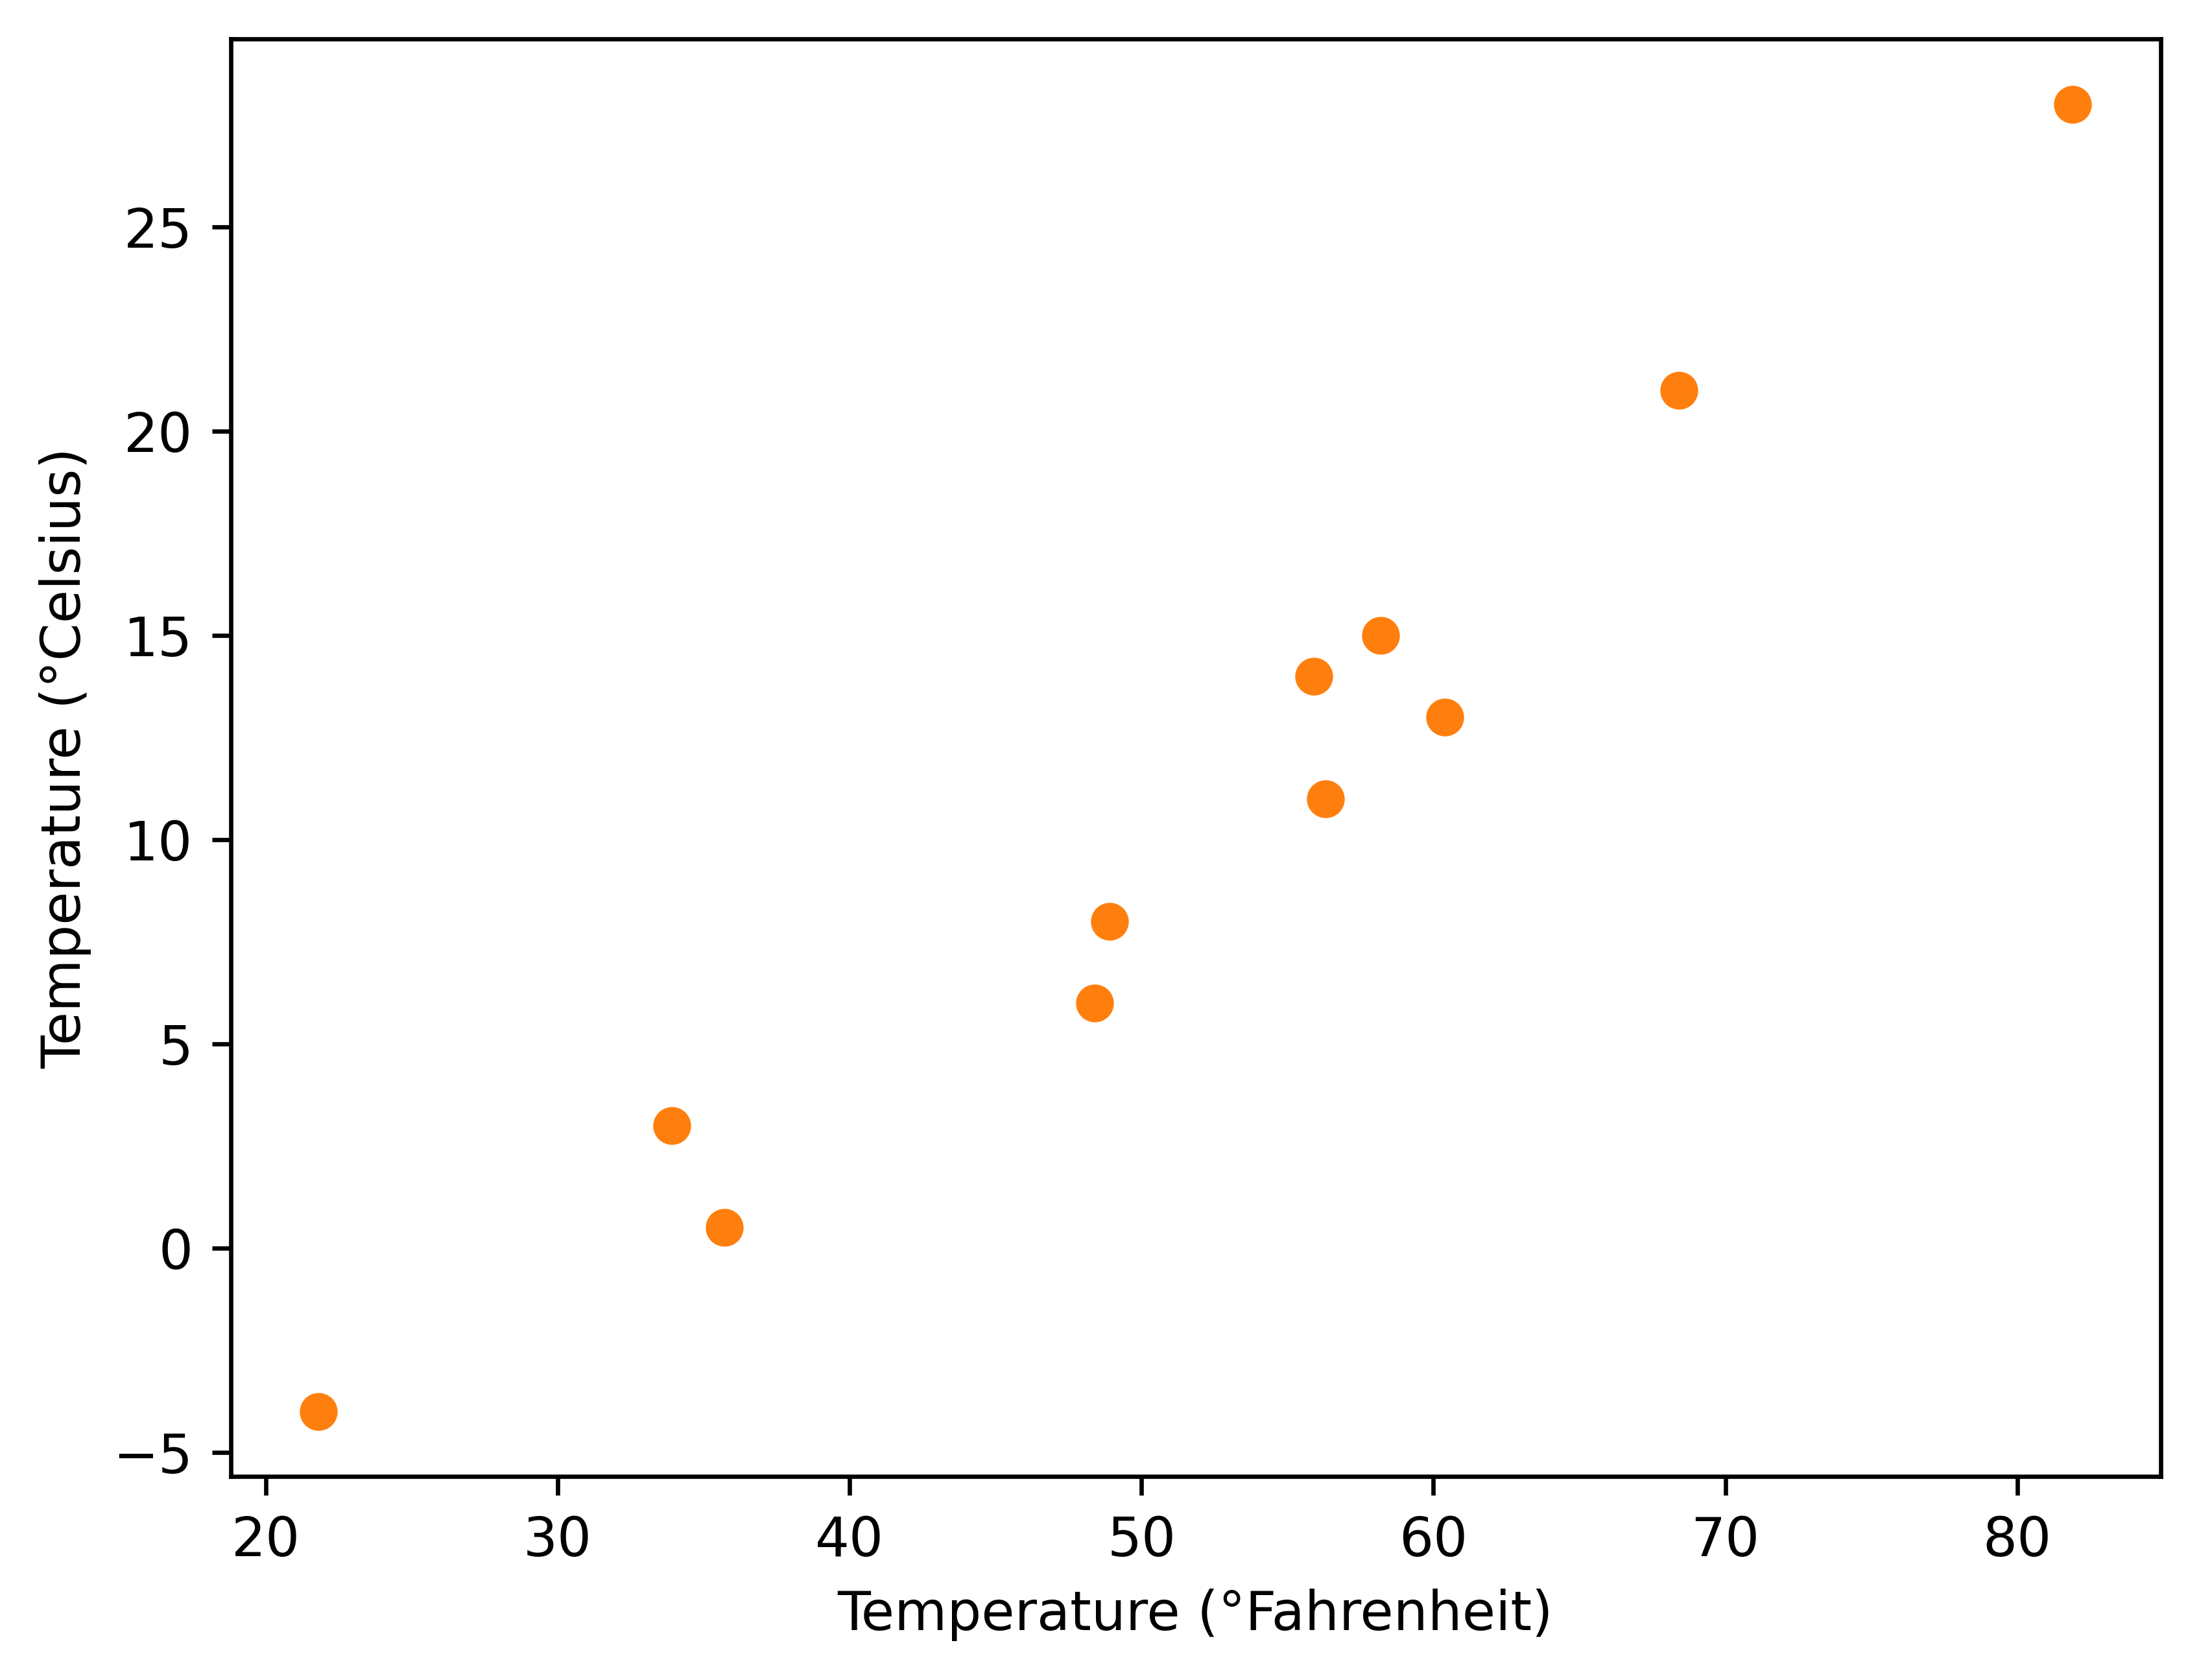

In [28]:
#Plotting the values. 
fig = plt.figure(dpi=600)
t_p = model(t_un, *params)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

In [29]:
#Defining the training loop for 2000 epochs, learning rate - 0.0001 using the "standardized" input
params = training_loop(
    n_epochs = 2000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c)

Epoch 500, Loss 9.678580
Epoch 1000, Loss 9.474418
Epoch 1500, Loss 9.275946
Epoch 2000, Loss 9.082996


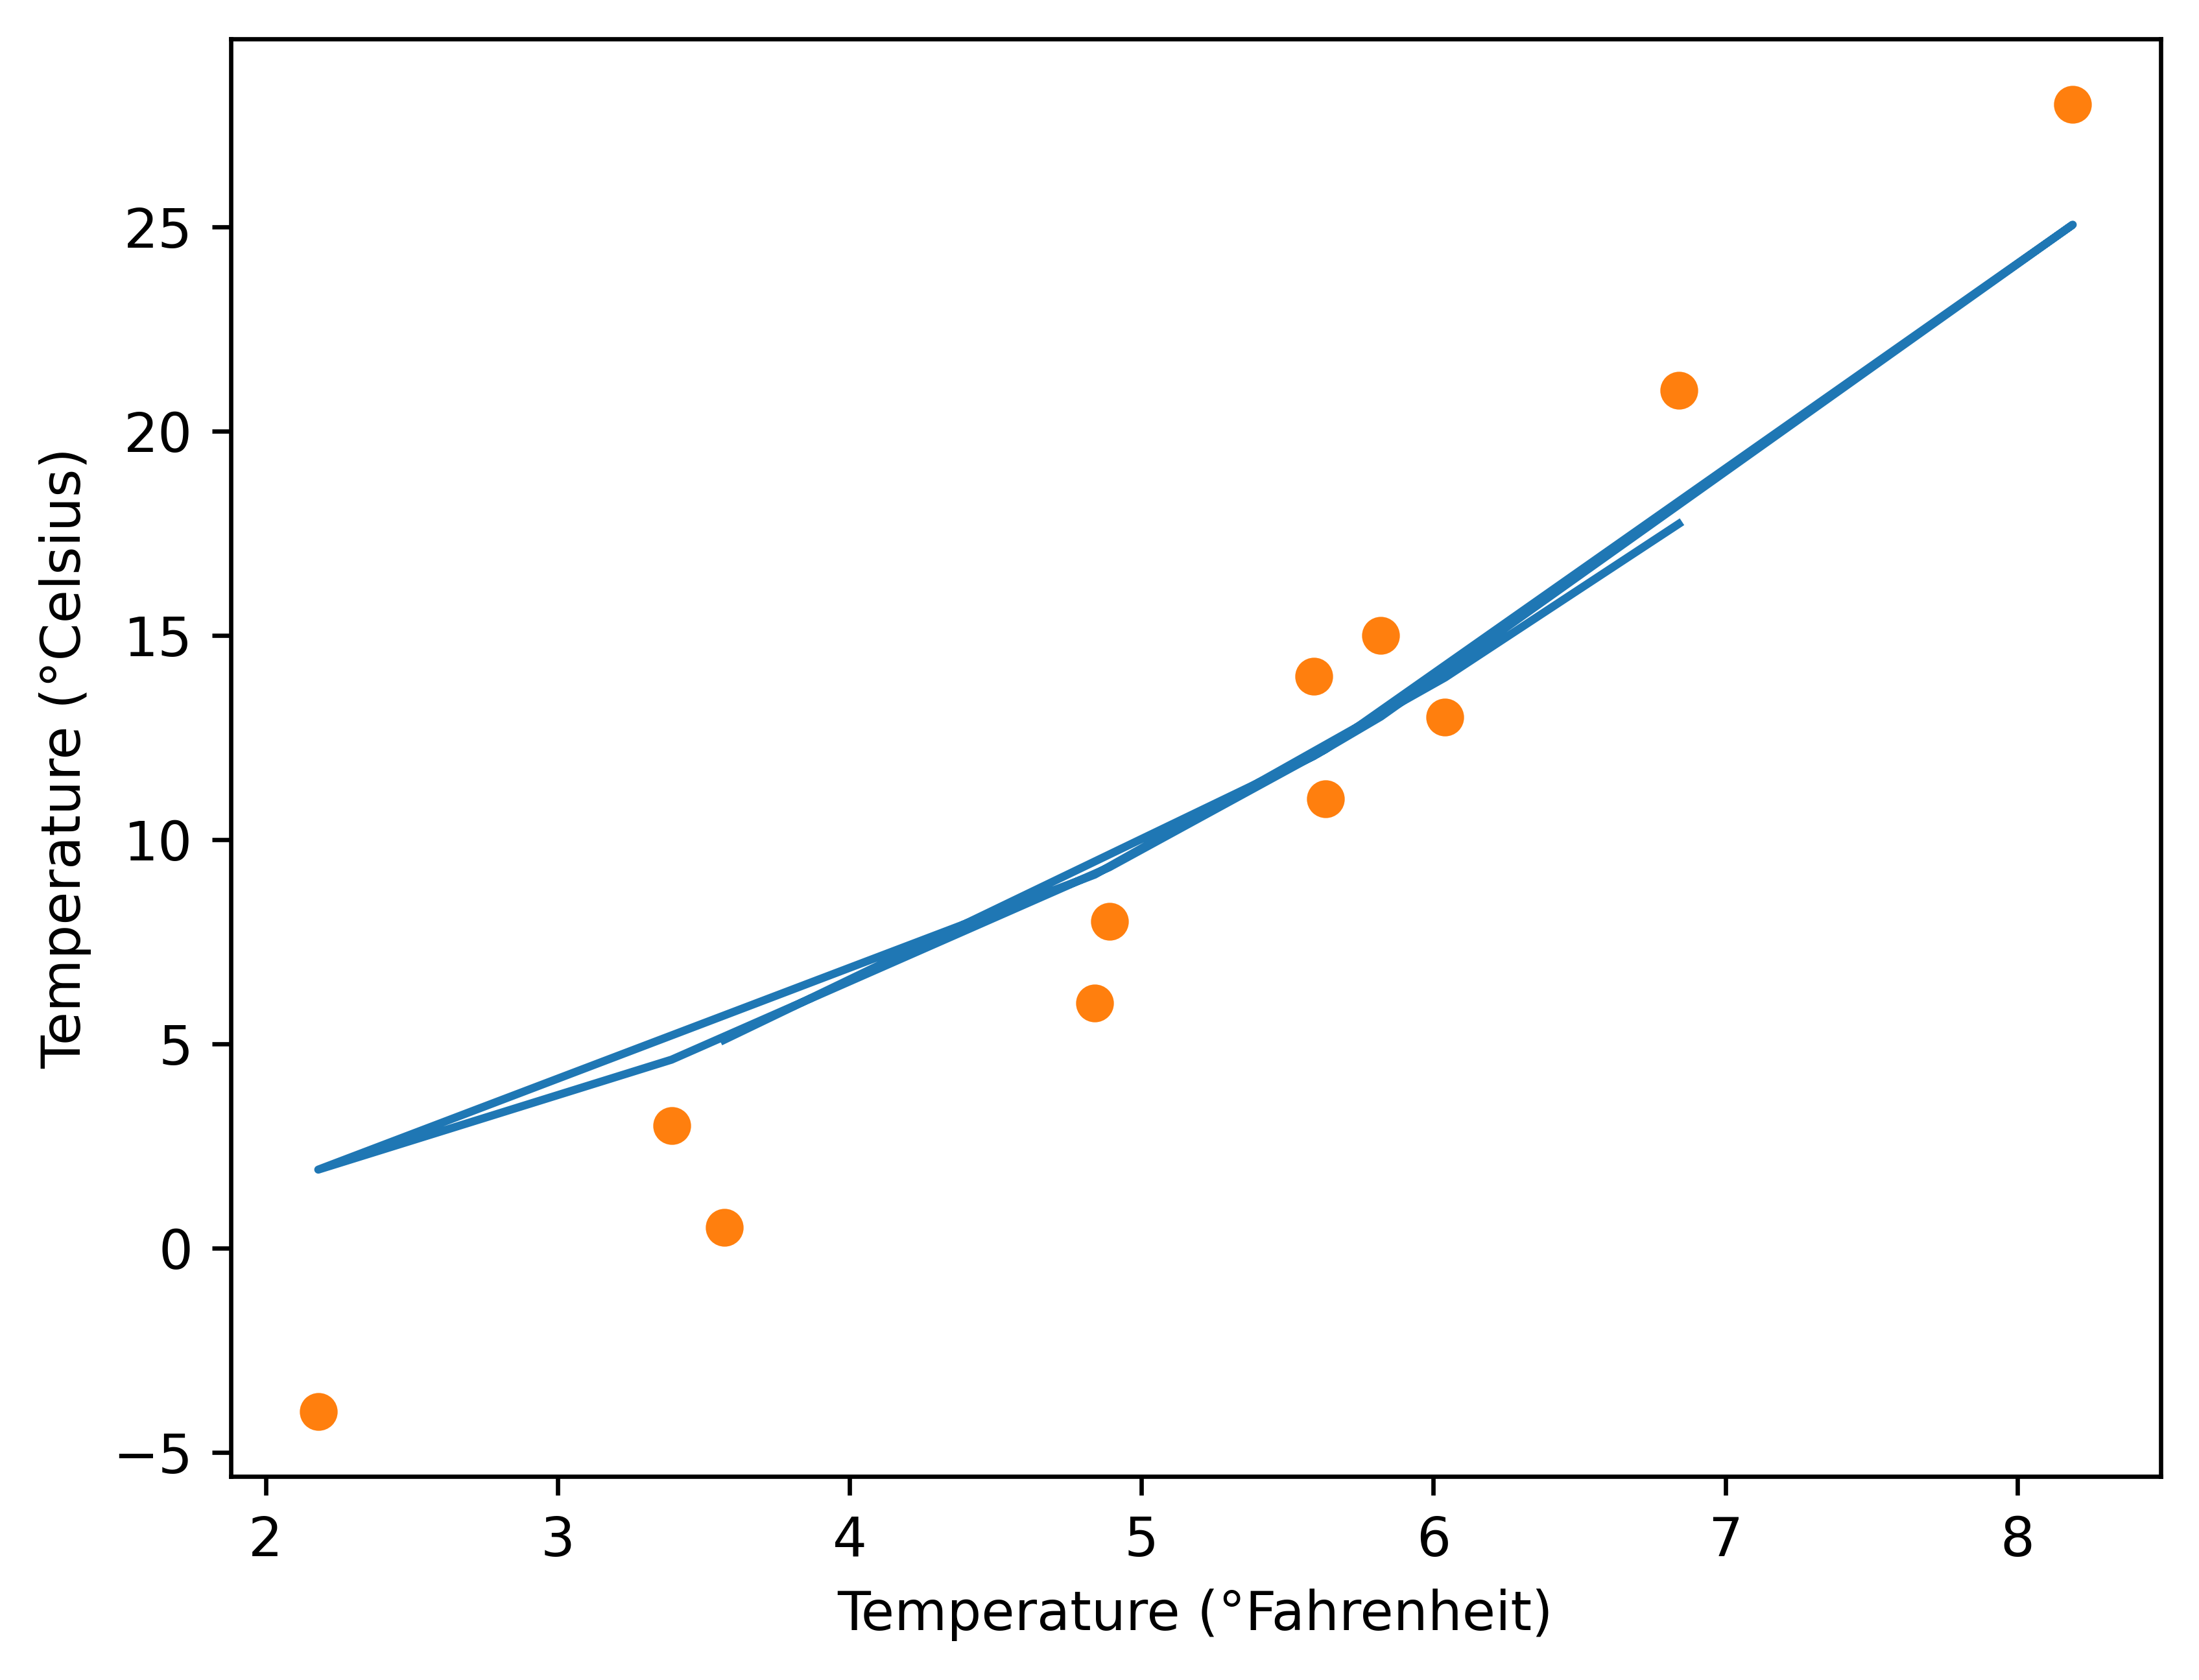

In [30]:
#Plotting the values. 
fig = plt.figure(dpi=600)
t_p = model(t_un, *params)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_un.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_un.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip